# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)

import seaborn as sns
print('seaborn version\t:',sns.__version__)


import sklearn
print('sklearn version\t:',sklearn.__version__)

import os
import platform
print('Python version\t:',platform.python_version())


# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore')



# To display all the columns
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 210)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline
from scipy import stats

#Importing Seaborn libraries
import seaborn as sns

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

#Importing Tensorflow
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

import pathlib
from scipy.misc import imread, imresize
#from scipy.misc.pilutil import imread,imresize
import datetime
from skimage import transform as trans
import cv2
from scipy.misc import imread, imresize
import datetime
import glob
from skimage import io
#from keras.applications import ResNet50
#from keras.applications import mobilenet

numpy version	: 1.19.5
pandas version	: 0.25.1
seaborn version	: 0.9.0
sklearn version	: 0.24.2
Python version	: 3.7.4


We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)
from skimage import transform as trans
import cv2

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_data = np.random.permutation(open('/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind//Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train.csv').readlines())
val_data = np.random.permutation(open('/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind//Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/val.csv').readlines())

In [5]:
print(len(train_data))
print(len(val_data))
train_file_path = '/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind//Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train'
val_file_path = '/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind//Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/val'

663
100


In [6]:
train_data_df = pd.DataFrame({'folder_name': train_data})
train_data_df[['folder_name', 'Gesture_name','Gesture_id']] = train_data_df.folder_name.str.split(";",expand=True)
train_data_df['Gesture_id'] = train_data_df['Gesture_id'].str.replace('\n','')

train_data_df.head()

,folder_name,Gesture_name,Gesture_id
0,WIN_20180926_16_54_08_Pro_Right_Swipe_new,Right_Swipe_new,1
1,WIN_20180925_18_02_58_Pro_Thumbs_Down_new,Thumbs_Down_new,3
2,WIN_20180925_17_33_08_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_17_51_17_Pro_Thumbs_Up_new,Thumbs_Up_new,4
4,WIN_20180926_17_17_35_Pro_Left_Swipe_new,Left_Swipe_new,0


In [7]:
val_data_df = pd.DataFrame({'folder_name': val_data})
val_data_df[['folder_name', 'Gesture_name','Gesture_id']] = val_data_df.folder_name.str.split(";",expand=True)
val_data_df['Gesture_id'] = val_data_df['Gesture_id'].str.replace('\n','')

val_data_df.head()

,folder_name,Gesture_name,Gesture_id
0,WIN_20180926_17_24_20_Pro_Thumbs_Down_new,Thumbs_Down_new,3
1,WIN_20180907_15_54_30_Pro_Thumbs Up_new,Thumbs Up_new,4
2,WIN_20180926_17_08_11_Pro_Stop_new,Stop_new,2
3,WIN_20180925_18_01_40_Pro_Left_Swipe_new,Left_Swipe_new,0
4,WIN_20180907_16_16_48_Pro_Stop Gesture_new,Stop Gesture_new,2


In [8]:
print(train_data_df.Gesture_id.value_counts())
print('\n')
print(val_data_df.Gesture_id.value_counts())

3    137
1    137
0    136
2    130
4    123
Name: Gesture_id, dtype: int64


1    23
2    22
3    21
0    18
4    16
Name: Gesture_id, dtype: int64


### Using Functions to plot Images and check Model Accuracies

In [9]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)
        
def plot_acc(model):
    fig, axes = plt.subplots(1,2,figsize=(15,4))
    axes[0].plot(model.history['loss'])   
    axes[0].plot(model.history['val_loss'])
    axes[0].legend(['Loss','Val Loss'])

    axes[1].plot(model.history['categorical_accuracy'])   
    axes[1].plot(model.history['val_categorical_accuracy'])
    axes[1].legend(['Categorical Accuracy','Val Categorical Accuracy'])

##### Plotting the images 

In [10]:
#Lets Plot the images
#Image Path of each class

right_swipe=glob.glob("/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train/WIN_20180926_16_54_08_Pro_Right_Swipe_new/*")
left_swipe=glob.glob("/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train/WIN_20180925_17_33_08_Pro_Left_Swipe_new/*")
thumbs_up=glob.glob("/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train/WIN_20180925_17_51_17_Pro_Thumbs_Up_new/*")
thumbs_down=glob.glob("/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train/WIN_20180925_18_02_58_Pro_Thumbs_Down_new/*")
stop=glob.glob("/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/val/WIN_20180926_17_08_11_Pro_Stop_new/*")

In [11]:
#lets read the image of each class

right_swipe_image = io.imread(right_swipe[0])
left_swipe_image = io.imread(left_swipe[0])
thumbs_up_image = io.imread(thumbs_up[0])
thumbs_down_image = io.imread(thumbs_down[0])
stop_image = io.imread(stop[0])

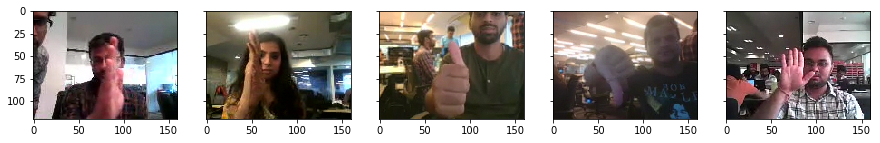

In [12]:
#Image Plotting.

plot_image([right_swipe_image,left_swipe_image,thumbs_up_image,thumbs_down_image,stop_image])

### Data Augumentation

#### 1. Image Flipping

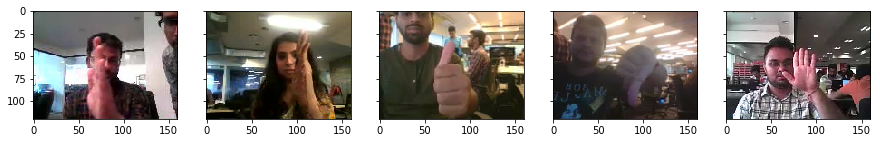

In [13]:
#Left-right Flip

def mirror_flip(image):
    return np.fliplr(image)

plot_image([mirror_flip(right_swipe_image),mirror_flip(left_swipe_image),mirror_flip(thumbs_up_image),mirror_flip(thumbs_down_image),mirror_flip(stop_image)])

#### 2. Image Zoom/Crop

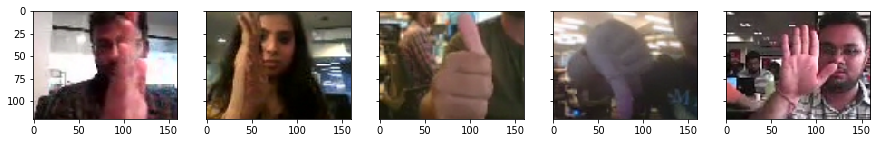

In [14]:
# Zoom/Crop images: Lets move the origin to the centre and later crop it from centre

def zoom_in_image(image):
    shift_x, shift_y =  image.shape[0]/2, image.shape[1]/2
    matrix_to_topleft = trans.SimilarityTransform(translation=[-shift_x, -shift_y])
    matrix_to_center = trans.SimilarityTransform(translation=[shift_x, shift_y])

    scale_transforms = trans.AffineTransform(scale=(0.6, 0.6))
    scale_matrix = matrix_to_topleft + scale_transforms + matrix_to_center
    return trans.warp(image, scale_matrix)

plot_image([zoom_in_image(right_swipe_image),zoom_in_image(left_swipe_image),zoom_in_image(thumbs_up_image),zoom_in_image(thumbs_down_image),zoom_in_image(stop_image)])

##### 3. Image Resize

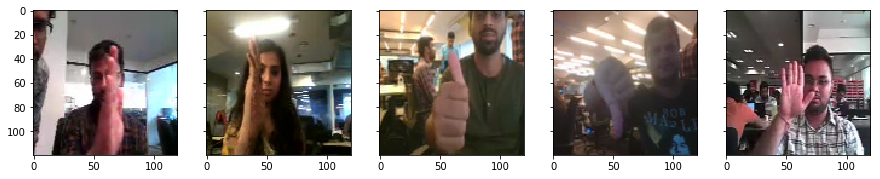

In [15]:
#Resize:

def resize(image,h,w):
    return (imresize(image,(h,w,3)))

h=120
w=120
plot_image([resize(right_swipe_image,h,w),resize(left_swipe_image,h,w),resize(thumbs_up_image,h,w),resize(thumbs_down_image,h,w),resize(stop_image,h,w)])

#### 4. Image Gaussian Noise

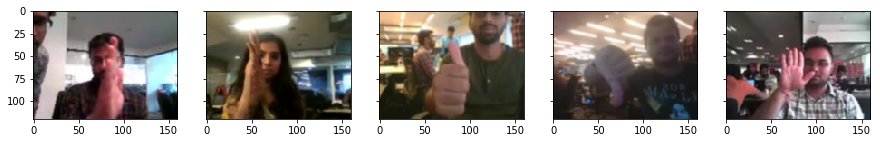

In [16]:
def gaussian_blur(image):
    return(cv2.GaussianBlur(image,(3,3),0))

plot_image([gaussian_blur(right_swipe_image),gaussian_blur(left_swipe_image),gaussian_blur(thumbs_up_image),gaussian_blur(thumbs_down_image),gaussian_blur(stop_image)])

#### 5. Image Normalization

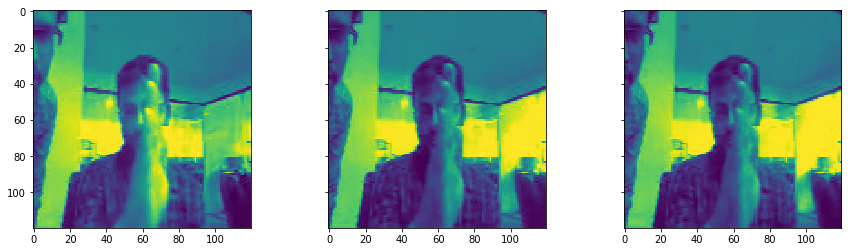

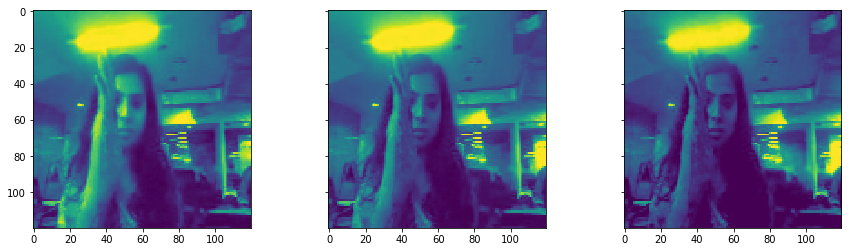

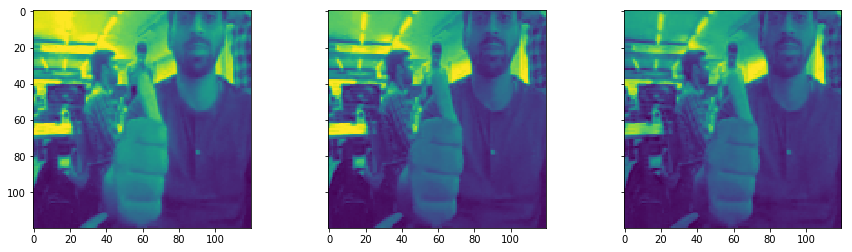

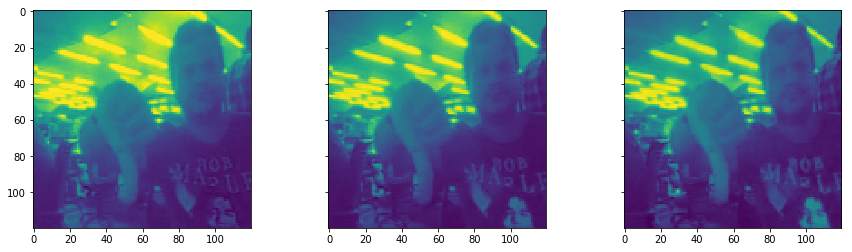

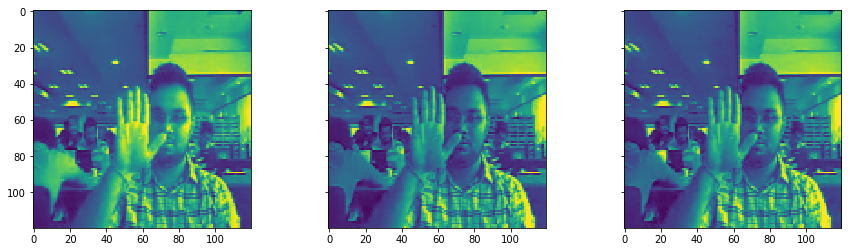

In [17]:
def normalize(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    R_norm = R - np.min(R)/(np.max(R) - np.min(R)) 
    G_norm = G - np.min(G)/(np.max(G) - np.min(G)) 
    B_norm = B - np.min(B)/(np.max(B) - np.min(B))
    
    return (R_norm, G_norm, B_norm)


h=120
w=120
plot_image(normalize(resize(right_swipe_image,h,w)))
plot_image(normalize(resize(left_swipe_image,h,w)))
plot_image(normalize(resize(thumbs_up_image,h,w)))
plot_image(normalize(resize(thumbs_down_image,h,w)))
plot_image(normalize(resize(stop_image,h,w)))

## Image pre-processing & Generator & Training
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

#### BEFORE GENERATOR, WE WILL DO IMAGE PRE-PROCESSING 
#### Pre-processing:-  Performing the Data augmentation and image resizing and return the image and corresponding label to generator code. 

In [18]:
def preprocessing(source_path,
                  folder_list,
                  batch_size,
                  height,
                  width,
                  flip,
                  zoom,
                  guasian,
                  batch,
                  t,
                  img_idx,
                  left_over_batch=0
                 ):
    
    batch_len = left_over_batch if left_over_batch else batch_size
    
    batch_data = np.zeros((batch_len,len(img_idx),height,width,3))
    batch_labels = np.zeros((batch_len,5))

    if flip:
        flip_data = np.zeros((batch_len,len(img_idx),height,width,3))
        flip_labels = np.zeros((batch_len,5))
    if zoom:
        zoom_data = np.zeros((batch_len,len(img_idx),height,width,3))
        zoom_labels = np.zeros((batch_len,5))
    if guasian:
        guassian_data = np.zeros((batch_len,len(img_idx),height,width,3))
        guassian_labels = np.zeros((batch_len,5))
        
    for folder in range(batch_len):
        imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0])
        
        for idx,item in enumerate(img_idx):
            image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
            
            #Resize:
            image_resize = imresize(image,(height,width,3))
            
            #Normalize:
            (R,G,B) = normalize(image_resize)
            
            batch_data[folder,idx,:,:,0] = R 
            batch_data[folder,idx,:,:,1] = G 
            batch_data[folder,idx,:,:,2] = B
            
            # Flip the image using left-right flip
            if flip:
                image_flip = mirror_flip(image)
                image_flip_resize = imresize(image_flip,(height,width,3))
                
                (R_flip,G_flip,B_flip) = normalize(image_flip_resize)
                flip_data[folder,idx,:,:,0] = R_flip
                flip_data[folder,idx,:,:,1] = G_flip
                flip_data[folder,idx,:,:,2] = B_flip
            
            # Affine transformation of the image to zoom/Crop
            if zoom:
                image_zoom = zoom_in_image(image)
                image_zoom_resize = imresize(image_zoom,(height,width,3))

                (R_zoom,G_zoom,B_zoom) = normalize(image_zoom_resize)
                zoom_data[folder,idx,:,:,0] = R_zoom
                zoom_data[folder,idx,:,:,1] = G_zoom
                zoom_data[folder,idx,:,:,2] = B_zoom
                
            # Applying Gaussion noise to the image
                
            if guasian:
                gaussian_image = gaussian_blur(image)
                gaussian_image_resize = imresize(gaussian_image,(height,width,3))
                
                (R_gaussian,G_gaussian,B_gaussian) = normalize(gaussian_image_resize)
                guassian_data[folder,idx,:,:,0] = R_gaussian
                guassian_data[folder,idx,:,:,1] = G_gaussian
                guassian_data[folder,idx,:,:,2] = B_gaussian
                                
        batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
        
        if flip:  ## Since we are flipping the images, right swipe will become left swipe after flip, so changing the labels of the image after flip
            if int(t[folder + (batch*batch_size)].strip().split(';')[2])==0:
                flip_labels[folder, 1] = 1
            elif int(t[folder + (batch*batch_size)].strip().split(';')[2])==1:
                flip_labels[folder, 0] = 1
            else:
                flip_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
                
        if zoom:
            zoom_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            
        if guasian:
            guassian_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
        
    if flip:
        batch_data = np.concatenate([batch_data,flip_data])
        batch_labels = np.concatenate([batch_labels,flip_labels])
        
    if zoom:
        batch_data = np.concatenate([batch_data,zoom_data])
        batch_labels = np.concatenate([batch_labels,zoom_labels])
        
    if guasian:
        batch_data = np.concatenate([batch_data,guassian_data])
        batch_labels = np.concatenate([batch_labels,guassian_labels])
        
        
    return batch_data,batch_labels
    


In [19]:
def generator(source_path, folder_list, batch_size, height, width, no_of_frames, flip, zoom, guasian):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = np.floor(np.linspace(0,29,no_of_frames)).astype(int)
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size
        for batch in range(num_batches):
            batch_data,batch_labels = preprocessing(source_path,folder_list,batch_size,height,width,flip,zoom,guasian,batch,t,img_idx)
            yield batch_data,batch_labels
        
        left_over_batch = len(t)%batch_size
        if (left_over_batch != 0):
            batch_data,batch_labels = preprocessing(source_path,folder_list,batch_size,height,width,flip,zoom,guasian,num_batches,t,img_idx,left_over_batch)
            yield batch_data,batch_labels
            


In [20]:
#Lets train the model

def model_training(train_data,
                   val_data,
                   model,height=120,
                   width=120,
                   no_of_frames=30,
                   epochs=10,
                   flip=False,
                   zoom=False,
                   guasian=False,
                   check_point=True,
                   ablation=False
                  ):
    
    curr_dt_time = datetime.datetime.now()
    train_file_path = '/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/train'
    val_file_path = '/Users/ajaymishra/Downloads/Neural_Nets_Project_Ajay_Aravind/Project_data/val'
    
    if ablation:
        train_data = train_data[:100]
        val_data = val_data[:60]
        
    num_train_sequences = len(train_data)
    print('# training sequences =', num_train_sequences)
    num_val_sequences = len(val_data)
    print('# validation sequences =', num_val_sequences)
    num_epochs = epochs
    print ('# epochs =', num_epochs)
    
    train_generator = generator(train_file_path, train_data, batch_size, height=height, width=width, no_of_frames=no_of_frames, flip=flip,zoom=zoom,guasian=guasian)
    val_generator = generator(val_file_path, val_data, batch_size, height=height, width=width, no_of_frames=no_of_frames, flip=False,zoom=False,guasian=False)
    
    model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
    if not os.path.exists(model_name):
        os.mkdir(model_name)
            
    filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
    
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    
    LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
    
    if check_point:  # If checkpoint is passed, then the model is saved to the above file path
        callbacks_list = [checkpoint,LR]
    else:
        callbacks_list = [LR]
        
    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = int(num_train_sequences/batch_size)
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    if (num_val_sequences%batch_size) == 0:
        validation_steps = int(num_val_sequences/batch_size)
    else:
        validation_steps = (num_val_sequences//batch_size) + 1
        
    trained_model = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
    
    return trained_model
    

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

#### Conv 3D Model -  Model1 : Conv 3D model with Image size of (120,120), no of frames are 30, batch size 1s 100 with no Data Augumenting

In [28]:
#Model-1

height=120
width=120
no_of_frames=30
epochs = 20
batch_size=100
flip=False
zoom=False
guasian=False

#write your model here
conv3d = Sequential()

conv3d.add(Conv3D(8,kernel_size=(3,3,3),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d.add(Conv3D(16,kernel_size=(3,3,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d.add(Conv3D(32,kernel_size=(1,3,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d.add(Conv3D(64,kernel_size=(1,3,3),padding='same'))
conv3d.add(Activation('relu'))
conv3d.add(BatchNormalization())
conv3d.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d.add(Dropout(0.25))

#conv3d.add(Conv3D(128,kernel_size=(3,3,3),padding='same'))
#conv3d.add(Activation('relu'))
#conv3d.add(BatchNormalization())
#conv3d.add(MaxPooling3D(pool_size=(2,2,2)))
          
conv3d.add(Flatten())

conv3d.add(Dense(256))
conv3d.add(Activation('relu'))
conv3d.add(Dropout(0.5))

conv3d.add(Dense(128))
conv3d.add(Activation('relu'))
conv3d.add(Dropout(0.5))


conv3d.add(Dense(5))
conv3d.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_13 (Conv3D)           (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation_22 (Activation)   (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_14 (Batc (None, 15, 60, 60, 16)    64        
_________________________________________________________________
activation_23 (Activation)   (None, 15, 60, 60, 16)    0         
__________

In [26]:
conv_3d = model_training(train_data,
               val_data,
               conv3d,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val ; batch size = 100
Source path =  Project_data/train ; batch size = 100
Epoch 1/20


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


4/7 [================>.............] - ETA: 1:15 - loss: 3.6986 - categorical_accuracy: 0.2625

MemoryError: 

    Above model clearly indicates that current GPU does not have enough memory to compute this task:
    
    Below things can be done:
    - below model would be executed by reducing the batch size (preferred approach).
    - Other alternatives are using a more GPU or reducing the network size.

#### Model1 : Conv 3D model with Image size of (120,120), no of frames are equal to 30 and Reduce batch size to 50 with no Data Augumenting

In [31]:
#Model-1

height=120
width=120
no_of_frames=30
epochs = 20
batch_size=50
flip=False
zoom=False
guasian=False

#write your model here
conv3d = Sequential()

conv3d.add(Conv3D(8,kernel_size=(3,3,3),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d.add(Conv3D(16,kernel_size=(3,3,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d.add(Conv3D(32,kernel_size=(1,3,3),padding='same'))
conv3d.add(BatchNormalization())
conv3d.add(Activation('relu'))
conv3d.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d.add(Conv3D(64,kernel_size=(1,3,3),padding='same'))
conv3d.add(Activation('relu'))
conv3d.add(BatchNormalization())
conv3d.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d.add(Dropout(0.25))

#conv3d.add(Conv3D(128,kernel_size=(3,3,3),padding='same'))
#conv3d.add(Activation('relu'))
#conv3d.add(BatchNormalization())
#conv3d.add(MaxPooling3D(pool_size=(2,2,2)))
          
conv3d.add(Flatten())

conv3d.add(Dense(256))
conv3d.add(Activation('relu'))
conv3d.add(Dropout(0.5))

conv3d.add(Dense(128))
conv3d.add(Activation('relu'))
conv3d.add(Dropout(0.5))


conv3d.add(Dense(5))
conv3d.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_21 (Batc (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation_36 (Activation)   (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_22 (Batc (None, 15, 60, 60, 16)    64        
_________________________________________________________________
activation_37 (Activation)   (None, 15, 60, 60, 16)    0         
__________

In [32]:
conv_3d = model_training(train_data,
               val_data,
               conv3d,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/valSource path =   Project_data/train ; batch size =; batch size = 50
 50
Epoch 1/20


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


14/14 [==============================] - 185s 13s/step - loss: 3.2291 - categorical_accuracy: 0.2327 - val_loss: 1.5870 - val_categorical_accuracy: 0.2900
Epoch 2/20
14/14 [==============================] - 79s 6s/step - loss: 1.8890 - categorical_accuracy: 0.3163 - val_loss: 1.2779 - val_categorical_accuracy: 0.3700
Epoch 3/20
14/14 [==============================] - 81s 6s/step - loss: 1.6001 - categorical_accuracy: 0.3359 - val_loss: 1.2978 - val_categorical_accuracy: 0.4200
Epoch 4/20
14/14 [==============================] - 81s 6s/step - loss: 1.4793 - categorical_accuracy: 0.4004 - val_loss: 1.2205 - val_categorical_accuracy: 0.5600
Epoch 5/20
14/14 [==============================] - 80s 6s/step - loss: 1.2933 - categorical_accuracy: 0.4562 - val_loss: 1.1342 - val_categorical_accuracy: 0.5300
Epoch 6/20
14/14 [==============================] - 81s 6s/step - loss: 1.2684 - categorical_accuracy: 0.4749 - val_loss: 1.1124 - val_categorical_accuracy: 0.5300
Epoch 7/20
14/14 [=======

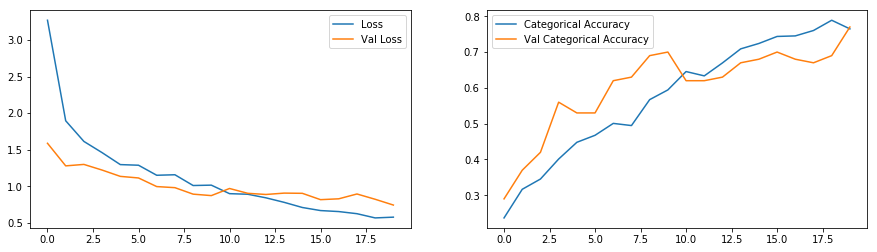

In [33]:
plot_acc(conv_3d)

Above graphs reporesent that categorical and validation accuracy are identical for the above model. 

#### Lets Check the model with Data Augmentation

##### Model1: Conv 3D model with Image size of (75,75) and no of frames are 20 with batch size of20

In [44]:
#Model-2

height=75
width=75
no_of_frames=20
epochs=15
batch_size=20
flip=True
zoom=True
guasian=True

#write your model here
conv3d_1 = Sequential()

conv3d_1.add(Conv3D(8,kernel_size=(3,3,3),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_1.add(BatchNormalization())
conv3d_1.add(Activation('relu'))
conv3d_1.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_1.add(Conv3D(16,kernel_size=(3,3,3),padding='same'))
conv3d_1.add(BatchNormalization())
conv3d_1.add(Activation('relu'))
conv3d_1.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_1.add(Conv3D(32,kernel_size=(3,3,3),padding='same'))
conv3d_1.add(BatchNormalization())
conv3d_1.add(Activation('relu'))
conv3d_1.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d_1.add(Conv3D(64,kernel_size=(3,3,3),padding='same'))
conv3d_1.add(Activation('relu'))
conv3d_1.add(BatchNormalization())
conv3d_1.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_1.add(Dropout(0.25))

conv3d_1.add(Flatten())

conv3d_1.add(Dense(256))
conv3d_1.add(Activation('relu'))
conv3d_1.add(Dropout(0.5))

conv3d_1.add(Dense(128))
conv3d_1.add(Activation('relu'))
conv3d_1.add(Dropout(0.5))


conv3d_1.add(Dense(5))
conv3d_1.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_53 (Conv3D)           (None, 20, 75, 75, 8)     656       
_________________________________________________________________
batch_normalization_53 (Batc (None, 20, 75, 75, 8)     32        
_________________________________________________________________
activation_77 (Activation)   (None, 20, 75, 75, 8)     0         
_________________________________________________________________
max_pooling3d_53 (MaxPooling (None, 10, 37, 37, 8)     0         
_________________________________________________________________
conv3d_54 (Conv3D)           (None, 10, 37, 37, 16)    3472      
_________________________________________________________________
batch_normalization_54 (Batc (None, 10, 37, 37, 16)    64        
_________________________________________________________________
activation_78 (Activation)   (None, 10, 37, 37, 16)    0         
__________

In [45]:
conv_3d_1 = model_training(train_data,
               val_data,
               conv3d_1,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 20
Source path =  Project_data/train ; batch size = 20
Epoch 1/15


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipyk

34/34 [==============================] - 208s 6s/step - loss: 2.2655 - categorical_accuracy: 0.2754 - val_loss: 1.3823 - val_categorical_accuracy: 0.4700
Epoch 2/15
34/34 [==============================] - 202s 6s/step - loss: 1.4770 - categorical_accuracy: 0.3289 - val_loss: 1.2956 - val_categorical_accuracy: 0.4900
Epoch 3/15
34/34 [==============================] - 203s 6s/step - loss: 1.4133 - categorical_accuracy: 0.3571 - val_loss: 1.1772 - val_categorical_accuracy: 0.5400
Epoch 4/15
34/34 [==============================] - 203s 6s/step - loss: 1.3588 - categorical_accuracy: 0.3975 - val_loss: 1.1982 - val_categorical_accuracy: 0.5300
Epoch 5/15
34/34 [==============================] - 202s 6s/step - loss: 1.2706 - categorical_accuracy: 0.4380 - val_loss: 1.2881 - val_categorical_accuracy: 0.4400

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/15
34/34 [==============================] - 202s 6s/step - loss: 1.1835 - categorical_accuracy: 0

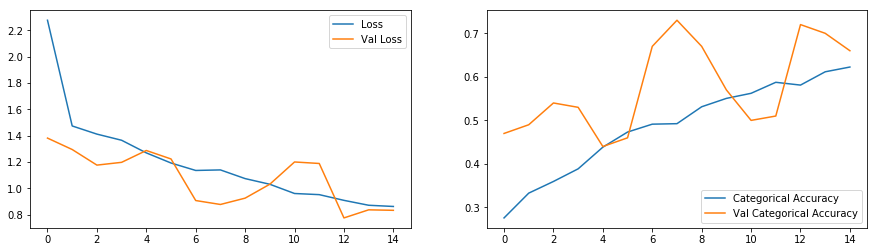

In [47]:
plot_acc(conv_3d_1)

As per above model Validation accuracies are oscillatory and is not similar like train accuracy.

### Build the Conv3D  with Filter size  of (2,2,2)
###### Conv3D model with image size of (120,120), batch size  of 50, no of frames of  30 and Kernel size of(2,2,2)    

In [48]:
#Model-3

height=120
width=120
no_of_frames=30
epochs=20
batch_size=50
flip=False
zoom=False
guasian=False

#write your model here
conv3d_2 = Sequential()

conv3d_2.add(Conv3D(8,kernel_size=(2,2,2),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_2.add(BatchNormalization())
conv3d_2.add(Activation('relu'))
conv3d_2.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_2.add(Conv3D(16,kernel_size=(2,2,2),padding='same'))
conv3d_2.add(BatchNormalization())
conv3d_2.add(Activation('relu'))
conv3d_2.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_2.add(Conv3D(32,kernel_size=(2,2,2),padding='same'))
conv3d_2.add(BatchNormalization())
conv3d_2.add(Activation('relu'))
conv3d_2.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d_2.add(Conv3D(64,kernel_size=(2,2,2),padding='same'))
conv3d_2.add(Activation('relu'))
conv3d_2.add(BatchNormalization())
conv3d_2.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_2.add(Dropout(0.25))

          
conv3d_2.add(Flatten())

conv3d_2.add(Dense(256))
conv3d_2.add(Activation('relu'))
conv3d_2.add(Dropout(0.5))

conv3d_2.add(Dense(128))
conv3d_2.add(Activation('relu'))
conv3d_2.add(Dropout(0.5))


conv3d_2.add(Dense(5))
conv3d_2.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_57 (Conv3D)           (None, 30, 120, 120, 8)   200       
_________________________________________________________________
batch_normalization_57 (Batc (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation_84 (Activation)   (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_57 (MaxPooling (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_58 (Conv3D)           (None, 15, 60, 60, 16)    1040      
_________________________________________________________________
batch_normalization_58 (Batc (None, 15, 60, 60, 16)    64        
_________________________________________________________________
activation_85 (Activation)   (None, 15, 60, 60, 16)    0         
__________

In [49]:
conv_3d_2 = model_training(train_data,
               val_data,
               conv3d_2,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val ; batch size = 50
Source path =  Project_data/train ; batch size = 50
Epoch 1/20
14/14 [==============================] - 96s 7s/step - loss: 2.9477 - categorical_accuracy: 0.2527 - val_loss: 1.2965 - val_categorical_accuracy: 0.5300
Epoch 2/20
14/14 [==============================] - 79s 6s/step - loss: 1.7706 - categorical_accuracy: 0.3124 - val_loss: 1.2283 - val_categorical_accuracy: 0.4600
Epoch 3/20
14/14 [==============================] - 80s 6s/step - loss: 1.4200 - categorical_accuracy: 0.3952 - val_loss: 1.2810 - val_categorical_accuracy: 0.4300
Epoch 4/20
14/14 [==============================] - 81s 6s/step - loss: 1.3192 - categorical_accuracy: 0.4425 - val_loss: 1.0922 - val_categorical_accuracy: 0.6100
Epoch 5/20
14/14 [==============================] - 80s 6s/step - loss: 1.2468 - categorical_accuracy: 0.4682 - val_loss: 0.9923 - val_categorical_accuracy: 0.7000
Epoch 6/

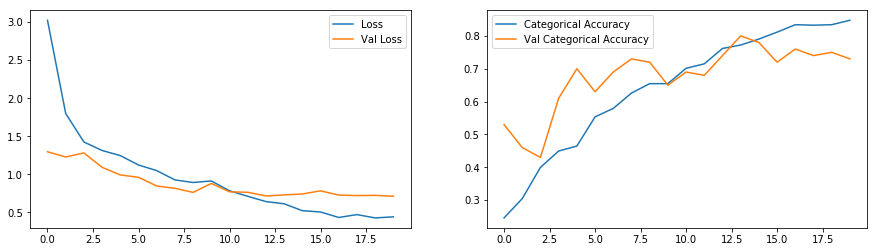

In [50]:
plot_acc(conv_3d_2)

As you can see in the above model, Filter has provided the details of each image and show the overfitting with validation accuracy of 70 % approx.

#### Build the Conv3D with Augementation - Filter size (2,2,2)

In [54]:
#Model-4

height=75
width=75
no_of_frames=20
epochs=15
batch_size=50
flip=True
zoom=True
guasian=True

#write your model here
conv3d_3 = Sequential()

conv3d_3.add(Conv3D(8,kernel_size=(2,2,2),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_3.add(BatchNormalization())
conv3d_3.add(Activation('relu'))
conv3d_3.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_3.add(Conv3D(16,kernel_size=(2,2,2),padding='same'))
conv3d_3.add(BatchNormalization())
conv3d_3.add(Activation('relu'))
conv3d_3.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_3.add(Conv3D(32,kernel_size=(2,2,2),padding='same'))
conv3d_3.add(BatchNormalization())
conv3d_3.add(Activation('relu'))
conv3d_3.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d_3.add(Conv3D(64,kernel_size=(2,2,2),padding='same'))
conv3d_3.add(Activation('relu'))
conv3d_3.add(BatchNormalization())
conv3d_3.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_3.add(Dropout(0.25))
          
conv3d_3.add(Flatten())

conv3d_3.add(Dense(256))
conv3d_3.add(Activation('relu'))
conv3d_3.add(Dropout(0.5))

conv3d_3.add(Dense(128))
conv3d_3.add(Activation('relu'))
conv3d_3.add(Dropout(0.5))


conv3d_3.add(Dense(5))
conv3d_3.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_69 (Conv3D)           (None, 20, 75, 75, 8)     200       
_________________________________________________________________
batch_normalization_69 (Batc (None, 20, 75, 75, 8)     32        
_________________________________________________________________
activation_105 (Activation)  (None, 20, 75, 75, 8)     0         
_________________________________________________________________
max_pooling3d_69 (MaxPooling (None, 10, 37, 37, 8)     0         
_________________________________________________________________
conv3d_70 (Conv3D)           (None, 10, 37, 37, 16)    1040      
_________________________________________________________________
batch_normalization_70 (Batc (None, 10, 37, 37, 16)    64        
_________________________________________________________________
activation_106 (Activation)  (None, 10, 37, 37, 16)    0         
__________

In [55]:
conv_3d_3 = model_training(train_data,
               val_data,
               conv3d_3,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 50
Source path =  Project_data/train ; batch size = 50
Epoch 1/15
14/14 [==============================] - 285s 20s/step - loss: 2.4636 - categorical_accuracy: 0.2330 - val_loss: 1.5036 - val_categorical_accuracy: 0.3100
Epoch 2/15
14/14 [==============================] - 202s 14s/step - loss: 1.5818 - categorical_accuracy: 0.2930 - val_loss: 1.4873 - val_categorical_accuracy: 0.2500
Epoch 3/15
14/14 [==============================] - 203s 14s/step - loss: 1.4698 - categorical_accuracy: 0.3315 - val_loss: 1.3978 - val_categorical_accuracy: 0.2700
Epoch 4/15
14/14 [==============================] - 203s 15s/step - loss: 1.3925 - categorical_accuracy: 0.3778 - val_loss: 1.3434 - val_categorical_accuracy: 0.3800
Epoch 5/15
14/14 [==============================] - 204s 15s/step - loss: 1.3331 - categorical_accuracy: 0.3946 - val_loss: 1.2504 - val_categorical_accuracy: 0.490

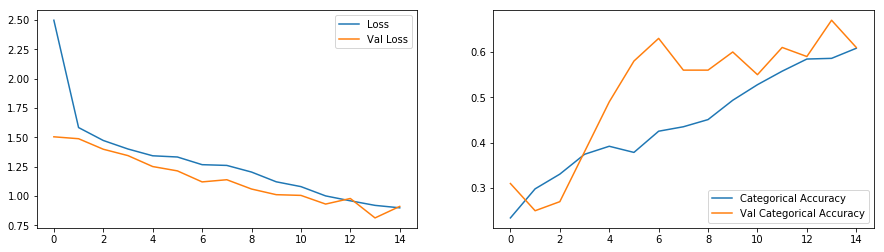

In [56]:
plot_acc(conv_3d_3)

### Build the Conv3D with Dropout
#### Conv3D model with image size of (120,120), batch size of 50 and no of frames of 30 with Dropout after each layer

In [21]:
#Model-5

height=120
width=120
no_of_frames=30
epochs=15
batch_size=50
flip=False
zoom=False
guasian=False

#write your model here
conv3d_4 = Sequential()

conv3d_4.add(Conv3D(8,kernel_size=(3,3,3),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_4.add(BatchNormalization())
conv3d_4.add(Activation('relu'))
conv3d_4.add(MaxPooling3D(pool_size=(2, 2,2)))
conv3d_4.add(Dropout(0.25))

conv3d_4.add(Conv3D(16,kernel_size=(3,3,3),padding='same'))
conv3d_4.add(BatchNormalization())
conv3d_4.add(Activation('relu'))
conv3d_4.add(MaxPooling3D(pool_size=(2, 2,2)))
conv3d_4.add(Dropout(0.25))

conv3d_4.add(Conv3D(32,kernel_size=(1,3,3),padding='same'))
conv3d_4.add(BatchNormalization())
conv3d_4.add(Activation('relu'))
conv3d_4.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_4.add(Dropout(0.25))

conv3d_4.add(Conv3D(64,kernel_size=(1,3,3),padding='same'))
conv3d_4.add(Activation('relu'))
conv3d_4.add(BatchNormalization())
conv3d_4.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_4.add(Dropout(0.25))
          
conv3d_4.add(Flatten())

conv3d_4.add(Dense(256))
conv3d_4.add(Activation('relu'))
conv3d_4.add(Dropout(0.5))

conv3d_4.add(Dense(128))
conv3d_4.add(Activation('relu'))
conv3d_4.add(Dropout(0.5))


conv3d_4.add(Dense(5))
conv3d_4.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_4.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 60, 60, 8)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 60, 60, 16)    64        
__________

In [22]:
conv_3d_4 = model_training(train_data,
               val_data,
               conv3d_4,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 50
Source path =  Project_data/train ; batch size = 50
Epoch 1/15
14/14 [==============================] - 216s 15s/step - loss: 3.7988 - categorical_accuracy: 0.2111 - val_loss: 1.4458 - val_categorical_accuracy: 0.3700
Epoch 2/15
14/14 [==============================] - 79s 6s/step - loss: 2.1303 - categorical_accuracy: 0.2671 - val_loss: 1.4205 - val_categorical_accuracy: 0.4400
Epoch 3/15
14/14 [==============================] - 79s 6s/step - loss: 1.6115 - categorical_accuracy: 0.3254 - val_loss: 1.4954 - val_categorical_accuracy: 0.3300
Epoch 4/15
14/14 [==============================] - 80s 6s/step - loss: 1.5263 - categorical_accuracy: 0.3159 - val_loss: 1.9525 - val_categorical_accuracy: 0.2200

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/15
14/14 [==============================] - 79s 6s/step - loss: 1.5204 - categori

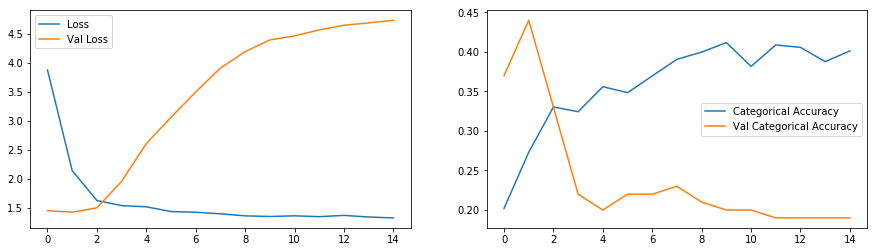

In [23]:
plot_acc(conv_3d_4)

Above model is clearly showing difference between both accuracies in each epochs.

#### Build Conv3D with image size (160,160), batch size of 30 and no of frames of 20

In [27]:
#Model-6

height=160
width=160
no_of_frames=20
epochs=20
batch_size=30
flip=False
zoom=False
guasian=False

#write your model here
conv3d_5 = Sequential()

conv3d_5.add(Conv3D(8,kernel_size=(5,5,5),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_5.add(BatchNormalization())
conv3d_5.add(Activation('relu'))
conv3d_5.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_5.add(Conv3D(16,kernel_size=(5,5,5),padding='same'))
conv3d_5.add(BatchNormalization())
conv3d_5.add(Activation('relu'))
conv3d_5.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_5.add(Conv3D(32,kernel_size=(3,3,3),padding='same'))
conv3d_5.add(BatchNormalization())
conv3d_5.add(Activation('relu'))
conv3d_5.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d_5.add(Conv3D(64,kernel_size=(3,3,3),padding='same'))
conv3d_5.add(Activation('relu'))
conv3d_5.add(BatchNormalization())
conv3d_5.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_5.add(Dropout(0.25))
          
conv3d_5.add(Flatten())

conv3d_5.add(Dense(256))
conv3d_5.add(Activation('relu'))
conv3d_5.add(Dropout(0.5))

conv3d_5.add(Dense(128))
conv3d_5.add(Activation('relu'))
conv3d_5.add(Dropout(0.5))


conv3d_5.add(Dense(5))
conv3d_5.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_5.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 20, 160, 160, 8)   3008      
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 160, 160, 8)   32        
_________________________________________________________________
activation_1 (Activation)    (None, 20, 160, 160, 8)   0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 10, 80, 80, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 10, 80, 80, 16)    16016     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 80, 80, 16)    64        
_________________________________________________________________
activation_2 (Activation)    (None, 10, 80, 80, 16)    0         
__________

In [28]:
conv_3d_5 = model_training(train_data,
               val_data,
               conv3d_5,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val ; batch size = 30
Source path =  Project_data/trainEpoch 1/20
 ; batch size = 30
23/23 [==============================] - 149s 6s/step - loss: 4.0254 - categorical_accuracy: 0.2628 - val_loss: 8.1983 - val_categorical_accuracy: 0.2300
Epoch 2/20
23/23 [==============================] - 61s 3s/step - loss: 1.9491 - categorical_accuracy: 0.3624 - val_loss: 2.6935 - val_categorical_accuracy: 0.2900
Epoch 3/20
23/23 [==============================] - 62s 3s/step - loss: 1.7123 - categorical_accuracy: 0.3275 - val_loss: 1.4202 - val_categorical_accuracy: 0.3700
Epoch 4/20
23/23 [==============================] - 63s 3s/step - loss: 1.4327 - categorical_accuracy: 0.3557 - val_loss: 1.3148 - val_categorical_accuracy: 0.4600
Epoch 5/20
23/23 [==============================] - 62s 3s/step - loss: 1.4186 - categorical_accuracy: 0.3885 - val_loss: 1.2049 - val_categorical_accuracy: 0.5400
Epoch 6

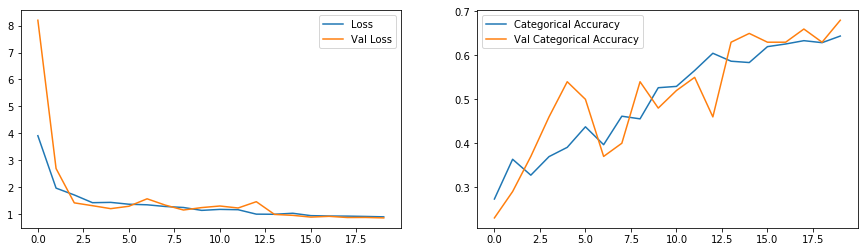

In [29]:
plot_acc(conv_3d_5)

#### Conv3D with image size of (120,120), batch size of 30, no of frames of 30 with  Data Augmentation

In [32]:
# model7

height=120
width=120
no_of_frames=20
epochs=15
batch_size=30
flip=True
zoom=True
guasian=True

#write your model here
conv3d_6 = Sequential()

conv3d_6.add(Conv3D(8,kernel_size=(5,5,5),input_shape=(no_of_frames,height,width,3),padding='same'))
conv3d_6.add(BatchNormalization())
conv3d_6.add(Activation('relu'))
conv3d_6.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_6.add(Conv3D(16,kernel_size=(5,5,5),padding='same'))
conv3d_6.add(BatchNormalization())
conv3d_6.add(Activation('relu'))
conv3d_6.add(MaxPooling3D(pool_size=(2, 2,2)))

conv3d_6.add(Conv3D(32,kernel_size=(3,3,3),padding='same'))
conv3d_6.add(BatchNormalization())
conv3d_6.add(Activation('relu'))
conv3d_6.add(MaxPooling3D(pool_size=(2,2,2)))

conv3d_6.add(Conv3D(64,kernel_size=(3,3,3),padding='same'))
conv3d_6.add(Activation('relu'))
conv3d_6.add(BatchNormalization())
conv3d_6.add(MaxPooling3D(pool_size=(2,2,2)))
conv3d_6.add(Dropout(0.25))
          
conv3d_6.add(Flatten())

conv3d_6.add(Dense(256))
conv3d_6.add(Activation('relu'))
conv3d_6.add(Dropout(0.5))

conv3d_6.add(Dense(128))
conv3d_6.add(Activation('relu'))
conv3d_6.add(Dropout(0.5))


conv3d_6.add(Dense(5))
conv3d_6.add(Activation('softmax'))

optimiser = optimizers.Adam()
conv3d_6.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_6.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 20, 120, 120, 8)   3008      
_________________________________________________________________
batch_normalization_9 (Batch (None, 20, 120, 120, 8)   32        
_________________________________________________________________
activation_15 (Activation)   (None, 20, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 10, 60, 60, 8)     0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 10, 60, 60, 16)    16016     
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 60, 60, 16)    64        
_________________________________________________________________
activation_16 (Activation)   (None, 10, 60, 60, 16)    0         
__________

In [33]:
conv_3d_6 = model_training(train_data,
               val_data,
               conv3d_6,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 30
Source path =  Project_data/train ; batch size = 30
Epoch 1/15
23/23 [==============================] - 312s 14s/step - loss: 2.2534 - categorical_accuracy: 0.2862 - val_loss: 2.0636 - val_categorical_accuracy: 0.2000
Epoch 2/15
23/23 [==============================] - 237s 10s/step - loss: 1.4953 - categorical_accuracy: 0.3209 - val_loss: 2.2766 - val_categorical_accuracy: 0.1700
Epoch 3/15
23/23 [==============================] - 240s 10s/step - loss: 1.4528 - categorical_accuracy: 0.3446 - val_loss: 1.4319 - val_categorical_accuracy: 0.3500
Epoch 4/15
23/23 [==============================] - 239s 10s/step - loss: 1.4510 - categorical_accuracy: 0.3637 - val_loss: 2.1178 - val_categorical_accuracy: 0.2400
Epoch 5/15
23/23 [==============================] - 238s 10s/step - loss: 1.4216 - categorical_accuracy: 0.3454 - val_loss: 1.2395 - val_categorical_accuracy: 0.480

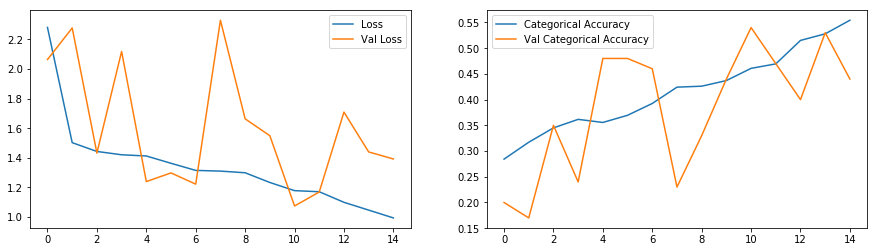

In [34]:
plot_acc(conv_3d_6)

Above model is not suitable as there are huge differences between train and validation accuracies

## CNN + RNN


The CNN-LSTM architecture involves using Convolutional Neural Network (CNN 2D) layers for feature extraction on input data combined with LSTMs to support sequence prediction.



#### Build Conv 2D + RNN (LSTM) Model + No Data Augument + Image size(75,75) + No of Frames of 15

In [35]:
height=120
width=120
no_of_frames=15
epochs = 15
batch_size=20
flip=False
zoom=False
guasian=False

cnn_rnn_model = Sequential()

cnn_rnn_model.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_rnn_model.add(TimeDistributed(Activation('relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_rnn_model.add(TimeDistributed(Activation('relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_rnn_model.add(TimeDistributed(Activation('relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_rnn_model.add(TimeDistributed(Activation('relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_rnn_model.add(TimeDistributed(Activation('relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model.add(TimeDistributed(Flatten()))

cnn_rnn_model.add(LSTM(128))
cnn_rnn_model.add(Dropout(0.25))

cnn_rnn_model.add(Dense(128))
cnn_rnn_model.add(Activation('relu'))
cnn_rnn_model.add(Dropout(0.25))

cnn_rnn_model.add(Dense(5))
cnn_rnn_model.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_rnn_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 15, 120, 120, 8)   224       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 120, 120, 8)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 120, 120, 8)   32        
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 60, 60, 8)     0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 60, 60, 16)    1168      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 15, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 15, 60, 60, 16)    64        
__________

In [36]:
cnn_rnn = model_training(train_data,
               val_data,
               cnn_rnn_model,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 20
Source path =  Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - 85s 2s/step - loss: 1.4701 - categorical_accuracy: 0.3274 - val_loss: 1.1851 - val_categorical_accuracy: 0.4800
Epoch 2/15
34/34 [==============================] - 40s 1s/step - loss: 1.1676 - categorical_accuracy: 0.5026 - val_loss: 1.1931 - val_categorical_accuracy: 0.5100
Epoch 3/15
34/34 [==============================] - 40s 1s/step - loss: 1.0186 - categorical_accuracy: 0.5732 - val_loss: 1.1757 - val_categorical_accuracy: 0.5300
Epoch 4/15
34/34 [==============================] - 40s 1s/step - loss: 0.9204 - categorical_accuracy: 0.6144 - val_loss: 1.0600 - val_categorical_accuracy: 0.6000
Epoch 5/15
34/34 [==============================] - 40s 1s/step - loss: 0.9133 - categorical_accuracy: 0.6159 - val_loss: 1.3323 - val_categorical_accuracy: 0.5400
Epoch 6/

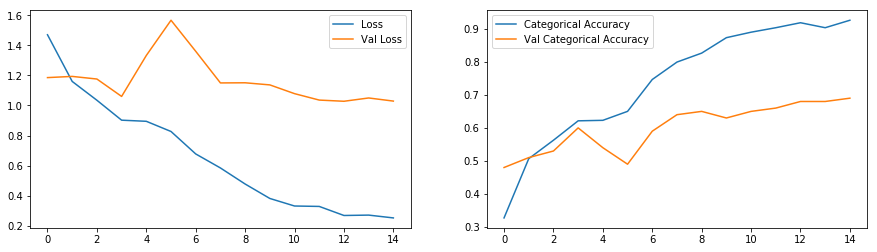

In [37]:
plot_acc(cnn_rnn)

Above plots are showing that around 7th epoch validaiton loss are there.

#### Build Conv 2D + RNN (LSTM) Model + Image size(75,75) + No of Frames of 15 + Image Flip + Image Zoom

In [38]:
height=75
width=75
no_of_frames=15
epochs = 15
batch_size=20
flip=True
zoom=True
guasian=False

cnn_rnn_model_1 = Sequential()

cnn_rnn_model_1.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_rnn_model_1.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_1.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_1.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_rnn_model_1.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_1.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_1.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_rnn_model_1.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_1.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_1.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_rnn_model_1.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_1.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_1.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_rnn_model_1.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_1.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_1.add(TimeDistributed(Flatten()))

cnn_rnn_model_1.add(LSTM(128))
cnn_rnn_model_1.add(Dropout(0.25))

cnn_rnn_model_1.add(Dense(128))
cnn_rnn_model_1.add(Activation('relu'))
cnn_rnn_model_1.add(Dropout(0.25))

cnn_rnn_model_1.add(Dense(5))
cnn_rnn_model_1.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_rnn_model_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_22 (TimeDis (None, 15, 75, 75, 8)     224       
_________________________________________________________________
time_distributed_23 (TimeDis (None, 15, 75, 75, 8)     0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 15, 75, 75, 8)     32        
_________________________________________________________________
time_distributed_25 (TimeDis (None, 15, 37, 37, 8)     0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 15, 37, 37, 16)    1168      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 15, 37, 37, 16)    0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, 15, 37, 37, 16)    64        
__________

In [39]:
cnn_rnn_1 = model_training(train_data,
               val_data,
               cnn_rnn_model_1,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 20
Source path =  Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - 135s 4s/step - loss: 1.4832 - categorical_accuracy: 0.3463 - val_loss: 1.4574 - val_categorical_accuracy: 0.3700
Epoch 2/15
34/34 [==============================] - 128s 4s/step - loss: 1.3302 - categorical_accuracy: 0.4251 - val_loss: 1.5429 - val_categorical_accuracy: 0.3700
Epoch 3/15
34/34 [==============================] - 128s 4s/step - loss: 1.1880 - categorical_accuracy: 0.4898 - val_loss: 1.2604 - val_categorical_accuracy: 0.4800
Epoch 4/15
34/34 [==============================] - 131s 4s/step - loss: 1.0992 - categorical_accuracy: 0.5389 - val_loss: 1.3342 - val_categorical_accuracy: 0.5000
Epoch 5/15
34/34 [==============================] - 131s 4s/step - loss: 0.9795 - categorical_accuracy: 0.5909 - val_loss: 1.2963 - val_categorical_accuracy: 0.4400

Ep

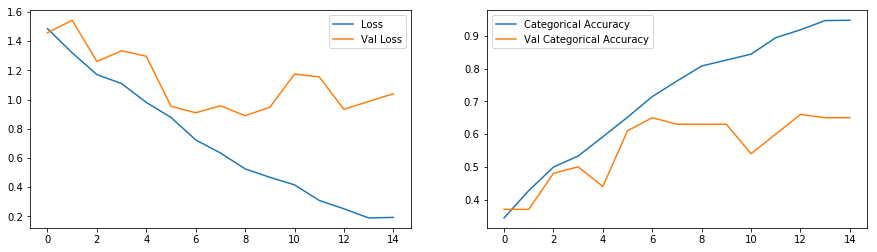

In [40]:
plot_acc(cnn_rnn_1)

Above plot is showing 60% Validation accuracies  where as training accuracy is more than 90 % which clearly results as overfitting

#### Build Conv 2D + RNN (LSTM) Model , Image size(75,75) , No of Frames  of 30  with Gaussian Blur

In [21]:
height=75
width=75
no_of_frames=30
epochs = 15
batch_size=20
flip=False
zoom=False
guasian=True

cnn_rnn_model_2 = Sequential()

cnn_rnn_model_2.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_rnn_model_2.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_2.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_2.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_rnn_model_2.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_2.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_2.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_rnn_model_2.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_2.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_2.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_rnn_model_2.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_2.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_2.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_rnn_model_2.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_2.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_2.add(TimeDistributed(Flatten()))

cnn_rnn_model_2.add(LSTM(128))
cnn_rnn_model_2.add(Dropout(0.25))

cnn_rnn_model_2.add(Dense(128))
cnn_rnn_model_2.add(Activation('relu'))
cnn_rnn_model_2.add(Dropout(0.25))

cnn_rnn_model_2.add(Dense(5))
cnn_rnn_model_2.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_rnn_model_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 30, 75, 75, 8)     224       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 75, 75, 8)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 75, 75, 8)     32        
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 37, 37, 8)     0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 37, 37, 16)    1168      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 30, 37, 37, 16)    0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 30, 37, 37, 16)    64        
__________

In [22]:
cnn_rnn_2 = model_training(train_data,
               val_data,
               cnn_rnn_model_2,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=False,
               zoom=False,
               guasian=True,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 20
Source path =  Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - 209s 6s/step - loss: 1.4880 - categorical_accuracy: 0.3355 - val_loss: 1.4608 - val_categorical_accuracy: 0.3600
Epoch 2/15
34/34 [==============================] - 107s 3s/step - loss: 1.2148 - categorical_accuracy: 0.5206 - val_loss: 1.3055 - val_categorical_accuracy: 0.4700
Epoch 3/15
34/34 [==============================] - 107s 3s/step - loss: 0.9791 - categorical_accuracy: 0.6273 - val_loss: 1.1264 - val_categorical_accuracy: 0.5200
Epoch 4/15
34/34 [==============================] - 106s 3s/step - loss: 0.8722 - categorical_accuracy: 0.6623 - val_loss: 1.1282 - val_categorical_accuracy: 0.5500
Epoch 5/15
34/34 [==============================] - 106s 3s/step - loss: 0.8099 - categorical_accuracy: 0.7082 - val_loss: 1.0768 - val_categorical_accuracy: 0.6000
Epo

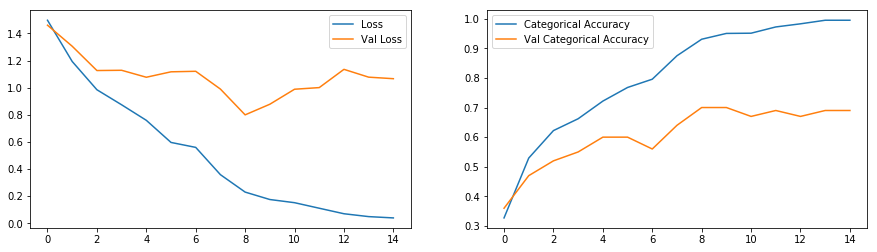

In [23]:
plot_acc(cnn_rnn_2)

Again plots are showing overfitting, lets increase the image dimensions.

#### Build Conv2D CNN + RNN  with No Augumenting , Image size of (120,120)  and No. of Frames of 30

In [24]:
height=120
width=120
no_of_frames=30
epochs = 15
batch_size=50
flip=False
zoom=False
guasian=False

cnn_rnn_model_3 = Sequential()

cnn_rnn_model_3.add(TimeDistributed(Conv2D(8,(5,5),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_rnn_model_3.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_3.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_3.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_rnn_model_3.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_3.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_3.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_rnn_model_3.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_3.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_3.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_rnn_model_3.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_3.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_3.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_rnn_model_3.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_3.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_3.add(TimeDistributed(Flatten()))

cnn_rnn_model_3.add(LSTM(128))
cnn_rnn_model_3.add(Dropout(0.25))

cnn_rnn_model_3.add(Dense(128))
cnn_rnn_model_3.add(Activation('relu'))
cnn_rnn_model_3.add(Dropout(0.25))

cnn_rnn_model_3.add(Dense(5))
cnn_rnn_model_3.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_rnn_model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_22 (TimeDis (None, 30, 120, 120, 8)   608       
_________________________________________________________________
time_distributed_23 (TimeDis (None, 30, 120, 120, 8)   0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 30, 120, 120, 8)   32        
_________________________________________________________________
time_distributed_25 (TimeDis (None, 30, 60, 60, 8)     0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 30, 60, 60, 16)    1168      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 30, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, 30, 60, 60, 16)    64        
__________

In [25]:
cnn_rnn_3 = model_training(train_data,
               val_data,
               cnn_rnn_model_3,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/valSource path =  Project_data/train ; batch size = 50
Epoch 1/15
 ; batch size = 50
14/14 [==============================] - 96s 7s/step - loss: 1.5277 - categorical_accuracy: 0.2743 - val_loss: 1.3467 - val_categorical_accuracy: 0.4100
Epoch 2/15
14/14 [==============================] - 79s 6s/step - loss: 1.2248 - categorical_accuracy: 0.5088 - val_loss: 1.1991 - val_categorical_accuracy: 0.4800
Epoch 3/15
14/14 [==============================] - 79s 6s/step - loss: 1.1429 - categorical_accuracy: 0.5509 - val_loss: 1.2846 - val_categorical_accuracy: 0.4500
Epoch 4/15
14/14 [==============================] - 79s 6s/step - loss: 1.0390 - categorical_accuracy: 0.5919 - val_loss: 1.1748 - val_categorical_accuracy: 0.5300
Epoch 5/15
14/14 [==============================] - 80s 6s/step - loss: 0.9331 - categorical_accuracy: 0.6413 - val_loss: 0.9587 - val_categorical_accuracy: 0.6000
Epoch 6/

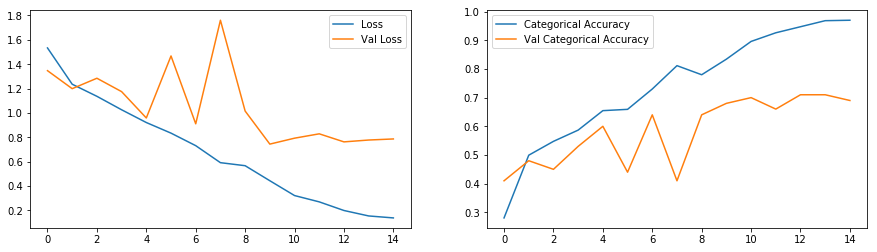

In [26]:
plot_acc(cnn_rnn_3)

#### Build Conv 2D + RNN (LSTM) Model with  Data Augmentation  having Image size of (75,75), No of Frames  of 30 

In [27]:
height=75
width=75
no_of_frames=30
epochs = 15
batch_size=50
flip=True
zoom=True
guasian=True

cnn_rnn_model_4 = Sequential()

cnn_rnn_model_4.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_rnn_model_4.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_4.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_4.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_4.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_rnn_model_4.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_4.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_4.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_4.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_rnn_model_4.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_4.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_4.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_4.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_rnn_model_4.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_4.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_4.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_4.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_rnn_model_4.add(TimeDistributed(Activation('relu')))
cnn_rnn_model_4.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model_4.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_rnn_model_4.add(TimeDistributed(Flatten()))

cnn_rnn_model_4.add(LSTM(128))
cnn_rnn_model_4.add(Dropout(0.25))

cnn_rnn_model_4.add(Dense(128))
cnn_rnn_model_4.add(Activation('relu'))
cnn_rnn_model_4.add(Dropout(0.25))

cnn_rnn_model_4.add(Dense(5))
cnn_rnn_model_4.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_rnn_model_4.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_43 (TimeDis (None, 30, 75, 75, 8)     224       
_________________________________________________________________
time_distributed_44 (TimeDis (None, 30, 75, 75, 8)     0         
_________________________________________________________________
time_distributed_45 (TimeDis (None, 30, 75, 75, 8)     32        
_________________________________________________________________
time_distributed_46 (TimeDis (None, 30, 37, 37, 8)     0         
_________________________________________________________________
time_distributed_47 (TimeDis (None, 30, 37, 37, 16)    1168      
_________________________________________________________________
time_distributed_48 (TimeDis (None, 30, 37, 37, 16)    0         
_________________________________________________________________
time_distributed_49 (TimeDis (None, 30, 37, 37, 16)    64        
__________

In [31]:
cnn_rnn_4 = model_training(train_data,
               val_data,
               cnn_rnn_model_4,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 50
Source path =  Project_data/train ; batch size = 50
Epoch 1/15
14/14 [==============================] - 310s 22s/step - loss: 1.4426 - categorical_accuracy: 0.4543 - val_loss: 1.3593 - val_categorical_accuracy: 0.4600
Epoch 2/15
14/14 [==============================] - 297s 21s/step - loss: 1.3017 - categorical_accuracy: 0.4927 - val_loss: 1.3205 - val_categorical_accuracy: 0.4700
Epoch 3/15
14/14 [==============================] - 296s 21s/step - loss: 1.2278 - categorical_accuracy: 0.5130 - val_loss: 1.3167 - val_categorical_accuracy: 0.4400
Epoch 4/15
14/14 [==============================] - 295s 21s/step - loss: 1.1785 - categorical_accuracy: 0.5327 - val_loss: 1.3207 - val_categorical_accuracy: 0.4500
Epoch 5/15
14/14 [==============================] - 296s 21s/step - loss: 1.1233 - categorical_accuracy: 0.5524 - val_loss: 1.2882 - val_categorical_accuracy: 0.430

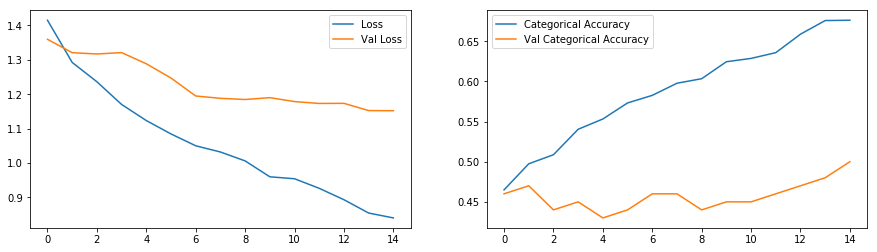

In [32]:
plot_acc(cnn_rnn_4)

Again both train and Validation accuracies are showing overfitting. Lets change the image size again.

#### Build Conv 2D + RNN (GRU) Model  with No Data Augument having Image size(120,120) and  No of Frames of 30

In [33]:
height=120
width=120
no_of_frames=30
epochs = 15
batch_size=20
flip=False
zoom=False
guasian=False

cnn_gru_model = Sequential()

cnn_gru_model.add(TimeDistributed(Conv2D(8,(5,5),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_gru_model.add(TimeDistributed(Activation('relu')))
cnn_gru_model.add(TimeDistributed(BatchNormalization()))
cnn_gru_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model.add(TimeDistributed(Conv2D(16,(5,5),padding='same')))
cnn_gru_model.add(TimeDistributed(Activation('relu')))
cnn_gru_model.add(TimeDistributed(BatchNormalization()))
cnn_gru_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_gru_model.add(TimeDistributed(Activation('relu')))
cnn_gru_model.add(TimeDistributed(BatchNormalization()))
cnn_gru_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_gru_model.add(TimeDistributed(Activation('relu')))
cnn_gru_model.add(TimeDistributed(BatchNormalization()))
cnn_gru_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_gru_model.add(TimeDistributed(Activation('relu')))
cnn_gru_model.add(TimeDistributed(BatchNormalization()))
cnn_gru_model.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model.add(TimeDistributed(Flatten()))

cnn_gru_model.add(GRU(128))
cnn_gru_model.add(Dropout(0.25))

cnn_gru_model.add(Dense(128))
cnn_gru_model.add(Activation('relu'))
cnn_gru_model.add(Dropout(0.25))

cnn_gru_model.add(Dense(5))
cnn_gru_model.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_gru_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_gru_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_64 (TimeDis (None, 30, 120, 120, 8)   608       
_________________________________________________________________
time_distributed_65 (TimeDis (None, 30, 120, 120, 8)   0         
_________________________________________________________________
time_distributed_66 (TimeDis (None, 30, 120, 120, 8)   32        
_________________________________________________________________
time_distributed_67 (TimeDis (None, 30, 60, 60, 8)     0         
_________________________________________________________________
time_distributed_68 (TimeDis (None, 30, 60, 60, 16)    3216      
_________________________________________________________________
time_distributed_69 (TimeDis (None, 30, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_70 (TimeDis (None, 30, 60, 60, 16)    64        
__________

In [34]:
cnn_gru = model_training(train_data,
               val_data,
               cnn_gru_model,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 20
Source path =  Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - 87s 3s/step - loss: 1.4046 - categorical_accuracy: 0.4253 - val_loss: 1.3146 - val_categorical_accuracy: 0.4600
Epoch 2/15
34/34 [==============================] - 79s 2s/step - loss: 1.1206 - categorical_accuracy: 0.5232 - val_loss: 1.0235 - val_categorical_accuracy: 0.6200
Epoch 3/15
34/34 [==============================] - 79s 2s/step - loss: 0.9608 - categorical_accuracy: 0.6159 - val_loss: 1.1191 - val_categorical_accuracy: 0.4600
Epoch 4/15
34/34 [==============================] - 80s 2s/step - loss: 0.8195 - categorical_accuracy: 0.6689 - val_loss: 0.9159 - val_categorical_accuracy: 0.6700
Epoch 5/15
34/34 [==============================] - 80s 2s/step - loss: 0.6432 - categorical_accuracy: 0.7410 - val_loss: 0.9801 - val_categorical_accuracy: 0.6000
Epoch 6/

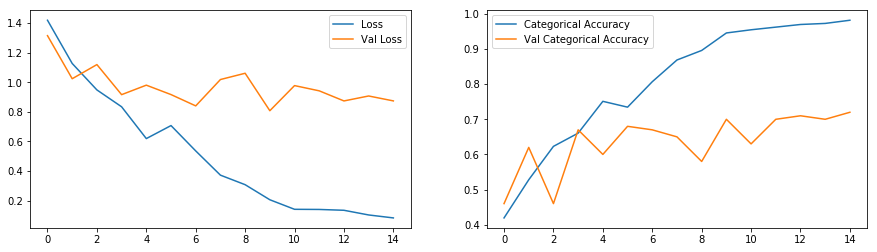

In [35]:
plot_acc(cnn_gru)

Above plot is showing improement in validation accuracy plateauing out where as train accuracy is improving with each epoch.

#### Build Conv 2D + RNN (GRU) Model  having  Image size of (75,75) , No of Frames =15 with Image Flip  and  Image Zoom

In [21]:
height=75
width=75
no_of_frames=20
epochs = 15
batch_size=100
flip=True
zoom=True
guasian=False

cnn_gru_model_1 = Sequential()

cnn_gru_model_1.add(TimeDistributed(Conv2D(8,(5,5),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_gru_model_1.add(TimeDistributed(Activation('relu')))
cnn_gru_model_1.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_1.add(TimeDistributed(Conv2D(16,(5,5),padding='same')))
cnn_gru_model_1.add(TimeDistributed(Activation('relu')))
cnn_gru_model_1.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_1.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_gru_model_1.add(TimeDistributed(Activation('relu')))
cnn_gru_model_1.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_1.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_gru_model_1.add(TimeDistributed(Activation('relu')))
cnn_gru_model_1.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_1.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_gru_model_1.add(TimeDistributed(Activation('relu')))
cnn_gru_model_1.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_1.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_1.add(TimeDistributed(Flatten()))

cnn_gru_model_1.add(GRU(128))
cnn_gru_model_1.add(Dropout(0.25))

cnn_gru_model_1.add(Dense(128))
cnn_gru_model_1.add(Activation('relu'))
cnn_gru_model_1.add(Dropout(0.25))

cnn_gru_model_1.add(Dense(5))
cnn_gru_model_1.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_gru_model_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_gru_model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 20, 75, 75, 8)     608       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 75, 75, 8)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 75, 75, 8)     32        
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 37, 37, 8)     0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 20, 37, 37, 16)    3216      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 20, 37, 37, 16)    0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 20, 37, 37, 16)    64        
__________

In [22]:
cnn_gru_1 = model_training(train_data,
               val_data,
               cnn_gru_model_1,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 100
Source path =  Project_data/train Epoch 1/15
; batch size = 100
7/7 [==============================] - 289s 41s/step - loss: 1.5910 - categorical_accuracy: 0.2921 - val_loss: 1.5020 - val_categorical_accuracy: 0.3900
Epoch 2/15
7/7 [==============================] - 170s 24s/step - loss: 1.3206 - categorical_accuracy: 0.4252 - val_loss: 1.4790 - val_categorical_accuracy: 0.4000
Epoch 3/15
7/7 [==============================] - 173s 25s/step - loss: 1.1249 - categorical_accuracy: 0.5284 - val_loss: 1.2027 - val_categorical_accuracy: 0.5100
Epoch 4/15
7/7 [==============================] - 175s 25s/step - loss: 0.9782 - categorical_accuracy: 0.6034 - val_loss: 1.1460 - val_categorical_accuracy: 0.5200
Epoch 5/15
7/7 [==============================] - 174s 25s/step - loss: 0.8331 - categorical_accuracy: 0.6825 - val_loss: 1.0473 - val_categorical_accuracy: 0.5900
Epoch 

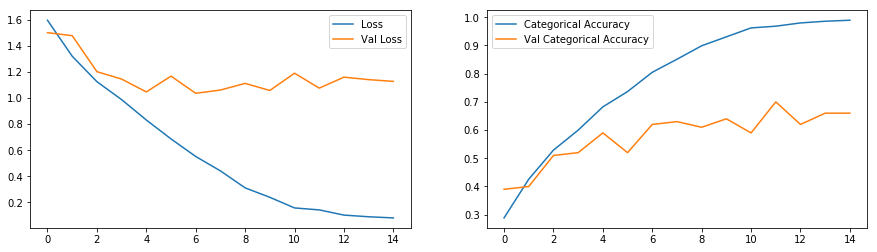

In [23]:
plot_acc(cnn_gru_1)

#### Build Conv 2D + RNN (GRU) Model with No Data Augument having Image size of (75,75),  No of frames  is 15,  Batch Size of 100  with  gaussian blur

In [24]:
height=75
width=75
no_of_frames=15
epochs = 15
batch_size=100
flip=False
zoom=False
guasian=True

cnn_gru_model_2 = Sequential()

cnn_gru_model_2.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_gru_model_2.add(TimeDistributed(Activation('relu')))
cnn_gru_model_2.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_2.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_gru_model_2.add(TimeDistributed(Activation('relu')))
cnn_gru_model_2.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_2.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_gru_model_2.add(TimeDistributed(Activation('relu')))
cnn_gru_model_2.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_2.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_gru_model_2.add(TimeDistributed(Activation('relu')))
cnn_gru_model_2.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_2.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_gru_model_2.add(TimeDistributed(Activation('relu')))
cnn_gru_model_2.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_2.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_2.add(TimeDistributed(Flatten()))

cnn_gru_model_2.add(GRU(128))
cnn_gru_model_2.add(Dropout(0.25))

cnn_gru_model_2.add(Dense(128))
cnn_gru_model_2.add(Activation('relu'))
cnn_gru_model_2.add(Dropout(0.25))

cnn_gru_model_2.add(Dense(5))
cnn_gru_model_2.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_gru_model_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_gru_model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_22 (TimeDis (None, 15, 75, 75, 8)     224       
_________________________________________________________________
time_distributed_23 (TimeDis (None, 15, 75, 75, 8)     0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 15, 75, 75, 8)     32        
_________________________________________________________________
time_distributed_25 (TimeDis (None, 15, 37, 37, 8)     0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 15, 37, 37, 16)    1168      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 15, 37, 37, 16)    0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, 15, 37, 37, 16)    64        
__________

In [25]:
cnn_gru_2 = model_training(train_data,
               val_data,
               cnn_gru_model_2,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=False,
               zoom=False,
               guasian=True,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  Project_data/val ; batch size = 100
Source path =  Project_data/train ; batch size = 100
Epoch 1/15
7/7 [==============================] - 110s 16s/step - loss: 1.5156 - categorical_accuracy: 0.3399 - val_loss: 1.2590 - val_categorical_accuracy: 0.4700
Epoch 2/15
7/7 [==============================] - 50s 7s/step - loss: 1.1054 - categorical_accuracy: 0.5597 - val_loss: 1.1065 - val_categorical_accuracy: 0.5300
Epoch 3/15
7/7 [==============================] - 53s 8s/step - loss: 0.8684 - categorical_accuracy: 0.6577 - val_loss: 0.9710 - val_categorical_accuracy: 0.5700
Epoch 4/15
7/7 [==============================] - 52s 7s/step - loss: 0.6379 - categorical_accuracy: 0.7693 - val_loss: 0.9353 - val_categorical_accuracy: 0.5800
Epoch 5/15
7/7 [==============================] - 53s 8s/step - loss: 0.4879 - categorical_accuracy: 0.8322 - val_loss: 0.9314 - val_categorical_accuracy: 0.6200
Epoch 6/15
7/7

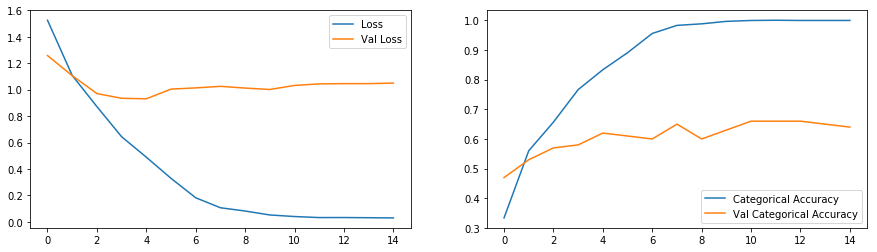

In [26]:
plot_acc(cnn_gru_2)

Above plot is still overfitting

#### Build Conv 2D + RNN (GRU) Model  having Image size of (100,100)  and no of frames  of 30

In [27]:
height=100
width=100
no_of_frames=30
epochs = 20
batch_size=50
flip=False
zoom=False
guasian=False

cnn_gru_model_3 = Sequential()

cnn_gru_model_3.add(TimeDistributed(Conv2D(8,(3,3),padding='same'),input_shape=(no_of_frames,height,width,3)))
cnn_gru_model_3.add(TimeDistributed(Activation('relu')))
cnn_gru_model_3.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_3.add(TimeDistributed(Conv2D(16,(3,3),padding='same')))
cnn_gru_model_3.add(TimeDistributed(Activation('relu')))
cnn_gru_model_3.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_3.add(TimeDistributed(Conv2D(32,(3,3),padding='same')))
cnn_gru_model_3.add(TimeDistributed(Activation('relu')))
cnn_gru_model_3.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_3.add(TimeDistributed(Conv2D(64,(3,3),padding='same')))
cnn_gru_model_3.add(TimeDistributed(Activation('relu')))
cnn_gru_model_3.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_3.add(TimeDistributed(Conv2D(128,(3,3),padding='same')))
cnn_gru_model_3.add(TimeDistributed(Activation('relu')))
cnn_gru_model_3.add(TimeDistributed(BatchNormalization()))
cnn_gru_model_3.add(TimeDistributed(MaxPooling2D((2,2))))

cnn_gru_model_3.add(TimeDistributed(Flatten()))

cnn_gru_model_3.add(GRU(128))
cnn_gru_model_3.add(Dropout(0.25))

cnn_gru_model_3.add(Dense(128))
cnn_gru_model_3.add(Activation('relu'))
cnn_gru_model_3.add(Dropout(0.25))

cnn_gru_model_3.add(Dense(5))
cnn_gru_model_3.add(Activation('softmax'))


optimiser = optimizers.Adam()
cnn_gru_model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_gru_model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_43 (TimeDis (None, 30, 100, 100, 8)   224       
_________________________________________________________________
time_distributed_44 (TimeDis (None, 30, 100, 100, 8)   0         
_________________________________________________________________
time_distributed_45 (TimeDis (None, 30, 100, 100, 8)   32        
_________________________________________________________________
time_distributed_46 (TimeDis (None, 30, 50, 50, 8)     0         
_________________________________________________________________
time_distributed_47 (TimeDis (None, 30, 50, 50, 16)    1168      
_________________________________________________________________
time_distributed_48 (TimeDis (None, 30, 50, 50, 16)    0         
_________________________________________________________________
time_distributed_49 (TimeDis (None, 30, 50, 50, 16)    64        
__________

In [28]:
cnn_gru_3 = model_training(train_data,
               val_data,
               cnn_gru_model_3,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val ; batch size = 50
Source path =  Project_data/train ; batch size = 50
Epoch 1/20
14/14 [==============================] - 130s 9s/step - loss: 1.4897 - categorical_accuracy: 0.3655 - val_loss: 1.1703 - val_categorical_accuracy: 0.4900
Epoch 2/20
14/14 [==============================] - 76s 5s/step - loss: 1.0113 - categorical_accuracy: 0.6002 - val_loss: 0.9534 - val_categorical_accuracy: 0.6200
Epoch 3/20
14/14 [==============================] - 76s 5s/step - loss: 0.8294 - categorical_accuracy: 0.6665 - val_loss: 0.8760 - val_categorical_accuracy: 0.6700
Epoch 4/20
14/14 [==============================] - 77s 5s/step - loss: 0.6631 - categorical_accuracy: 0.7592 - val_loss: 0.7939 - val_categorical_accuracy: 0.7300
Epoch 5/20
14/14 [==============================] - 76s 5s/step - loss: 0.5085 - categorical_accuracy: 0.8280 - val_loss: 0.9287 - val_categorical_accuracy: 0.6300
Epoch 6

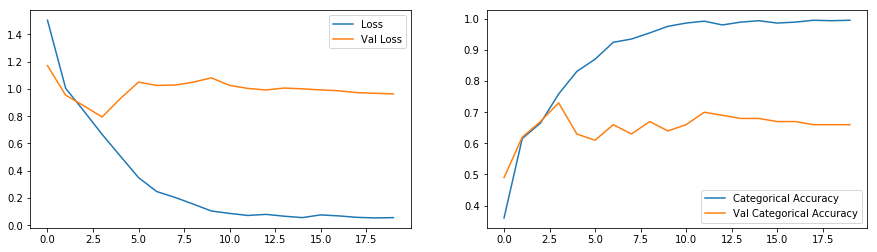

In [29]:
plot_acc(cnn_gru_3)

## Transfer learning

The biggest advantage of using such a network is that we can load a pre-trained version of the network trained on more than a million images from the ImageNet database. Such models are optimised and are easy to use.

#### Build model in Transfer Learning(ResNet50)  with No Data Augument  having Image size(100,100) and  No of Frames is 30

In [31]:
height=100
width=100
no_of_frames=30
epochs = 20
batch_size=50
flip=False
zoom=False
guasian=False

resnet_model = ResNet50(weights='imagenet', include_top=False)

transfer_model = Sequential()
transfer_model.add(TimeDistributed(resnet_model,input_shape=(no_of_frames,height,width,3)))

transfer_model.add(TimeDistributed(BatchNormalization()))
transfer_model.add(TimeDistributed(MaxPooling2D((2, 2))))

transfer_model.add(TimeDistributed(Flatten()))


transfer_model.add(GRU(128))
transfer_model.add(Dropout(0.25))

transfer_model.add(Dense(128))
transfer_model.add(Activation('relu'))
transfer_model.add(Dropout(0.25))

transfer_model.add(Dense(5))
transfer_model.add(Activation('softmax'))


optimiser = optimizers.Adam()
transfer_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (transfer_model.summary())

94658560/94653016 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_64 (TimeDis (None, 30, 3, 3, 2048)    23587712  
_________________________________________________________________
time_distributed_65 (TimeDis (None, 30, 3, 3, 2048)    8192      
_________________________________________________________________
time_distributed_66 (TimeDis (None, 30, 1, 1, 2048)    0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 30, 2048)          0         
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               835968    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (De

MobileNet is having less number of parameters for training model than ImageNet and performance is similar to a ResNet50 model hence all models would be created using MobileNet only.

#### Build Transfer Learning modeil using MobileNet with No Data Augument, Image size of 120,120  and  No of Frames are 15  with  Batch size of 25


In [32]:
height=120
width=120
no_of_frames=15
epochs = 20
batch_size=25
flip=False
zoom=False
guasian=False

mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)

transfer_model_1 = Sequential()
transfer_model_1.add(TimeDistributed(mobilenet_model,input_shape=(no_of_frames,height,width,3)))

transfer_model_1.add(TimeDistributed(BatchNormalization()))
transfer_model_1.add(TimeDistributed(MaxPooling2D((2, 2))))

transfer_model_1.add(TimeDistributed(Flatten()))


transfer_model_1.add(GRU(128))
transfer_model_1.add(Dropout(0.25))

transfer_model_1.add(Dense(128))
transfer_model_1.add(Activation('relu'))
transfer_model_1.add(Dropout(0.25))

transfer_model_1.add(Dense(5))
transfer_model_1.add(Activation('softmax'))


optimiser = optimizers.Adam()
transfer_model_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (transfer_model_1.summary())

17227776/17225924 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_68 (TimeDis (None, 15, 3, 3, 1024)    3228864   
_________________________________________________________________
time_distributed_69 (TimeDis (None, 15, 3, 3, 1024)    4096      
_________________________________________________________________
time_distributed_70 (TimeDis (None, 15, 1, 1, 1024)    0         
_________________________________________________________________
time_distributed_71 (TimeDis (None, 15, 1024)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 128)               442752    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (De

In [33]:
transfer_1 = model_training(train_data,
               val_data,
               transfer_model_1,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path = Source path =  Project_data/trainEpoch 1/20
 ; batch size =  Project_data/val ; batch size = 25
25
27/27 [==============================] - 56s 2s/step - loss: 1.1358 - categorical_accuracy: 0.5352 - val_loss: 0.7102 - val_categorical_accuracy: 0.6800
Epoch 2/20
27/27 [==============================] - 37s 1s/step - loss: 0.4110 - categorical_accuracy: 0.8430 - val_loss: 0.7086 - val_categorical_accuracy: 0.6900
Epoch 3/20
27/27 [==============================] - 41s 2s/step - loss: 0.2306 - categorical_accuracy: 0.9366 - val_loss: 0.4048 - val_categorical_accuracy: 0.8300
Epoch 4/20
27/27 [==============================] - 42s 2s/step - loss: 0.1385 - categorical_accuracy: 0.9555 - val_loss: 0.8191 - val_categorical_accuracy: 0.7200
Epoch 5/20
27/27 [==============================] - 42s 2s/step - loss: 0.1157 - categorical_accuracy: 0.9600 - val_loss: 0.3506 - val_categorical_accuracy: 0.8500
Epoch 6/

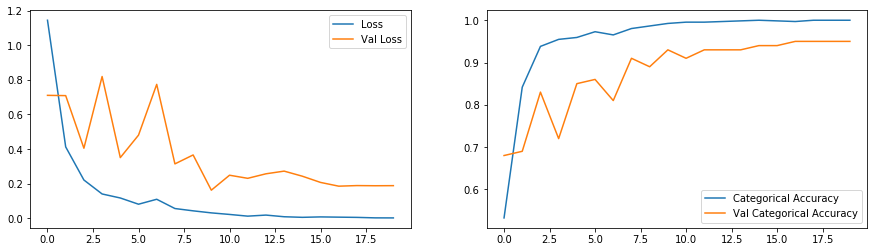

In [35]:
plot_acc(transfer_1)

Above plot is showing performance improvements.

#### Build Transfer Learning model using MobileNet with Image size of 120,120  and  No of Frames  are 15  with Batch Size of 5  using both Image Flip and Image Zoom

In [36]:
height=120
width=120
no_of_frames=15
epochs = 20
batch_size=5
flip=True
zoom=True
guasian=False

mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)

transfer_model_2 = Sequential()
transfer_model_2.add(TimeDistributed(mobilenet_model,input_shape=(no_of_frames,height,width,3)))

transfer_model_2.add(TimeDistributed(BatchNormalization()))
transfer_model_2.add(TimeDistributed(MaxPooling2D((2, 2))))

transfer_model_2.add(TimeDistributed(Flatten()))


transfer_model_2.add(GRU(128))
transfer_model_2.add(Dropout(0.25))

transfer_model_2.add(Dense(128))
transfer_model_2.add(Activation('relu'))
transfer_model_2.add(Dropout(0.25))

transfer_model_2.add(Dense(5))
transfer_model_2.add(Activation('softmax'))


optimiser = optimizers.Adam()
transfer_model_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (transfer_model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_76 (TimeDis (None, 15, 3, 3, 1024)    3228864   
_________________________________________________________________
time_distributed_77 (TimeDis (None, 15, 3, 3, 1024)    4096      
_________________________________________________________________
time_distributed_78 (TimeDis (None, 15, 1, 1, 1024)    0         
_________________________________________________________________
time_distributed_79 (TimeDis (None, 15, 1024)          0         
_________________________________________________________________
gru_7 (GRU)                  (None, 128)               442752    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
__________

In [37]:
transfer_2 = model_training(train_data,
               val_data,
               transfer_model_2,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=False,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val Source path =  Project_data/train ; batch size = 5
Epoch 1/20
; batch size = 5
133/133 [==============================] - 160s 1s/step - loss: 1.3149 - categorical_accuracy: 0.4414 - val_loss: 0.9012 - val_categorical_accuracy: 0.6400
Epoch 2/20
133/133 [==============================] - 145s 1s/step - loss: 0.8614 - categorical_accuracy: 0.6550 - val_loss: 1.4055 - val_categorical_accuracy: 0.3900
Epoch 3/20
133/133 [==============================] - 150s 1s/step - loss: 0.6348 - categorical_accuracy: 0.7529 - val_loss: 0.5432 - val_categorical_accuracy: 0.7900
Epoch 4/20
133/133 [==============================] - 148s 1s/step - loss: 0.4764 - categorical_accuracy: 0.8237 - val_loss: 0.4054 - val_categorical_accuracy: 0.8700
Epoch 5/20
133/133 [==============================] - 149s 1s/step - loss: 0.3453 - categorical_accuracy: 0.8835 - val_loss: 0.3335 - val_categorical_accuracy: 0.

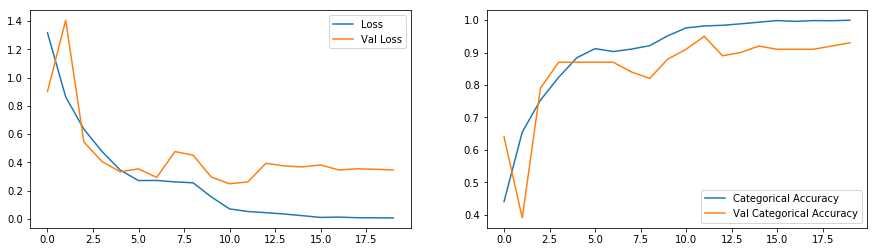

In [38]:
plot_acc(transfer_2)

Using Smaller batch size, plot is showing increase in training and validation accuracies.

#### Build Transfer Learning model using MobileNet with Image size of 120,120, No of Images are 15  with Batch size of 5 using  Gausian.

In [22]:
!cat /proc/meminfo

MemTotal:       15393416 kB
MemFree:        11846084 kB
MemAvailable:   14057144 kB
Buffers:           52336 kB
Cached:          2308396 kB
SwapCached:            0 kB
Active:          1528868 kB
Inactive:        1628064 kB
Active(anon):     801084 kB
Inactive(anon):       96 kB
Active(file):     727784 kB
Inactive(file):  1627968 kB
Unevictable:        5408 kB
Mlocked:            5408 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:                 4 kB
Writeback:             0 kB
AnonPages:        801772 kB
Mapped:           277748 kB
Shmem:               928 kB
Slab:             243624 kB
SReclaimable:     189496 kB
SUnreclaim:        54128 kB
KernelStack:        3696 kB
PageTables:        11176 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     7696708 kB
Committed_AS:    2056368 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
HardwareCorrupted:     0 kB
AnonHugePages:   

In [25]:
height=120
width=120
no_of_frames=15
epochs = 20
batch_size=5
flip=False
zoom=False
guasian=True

mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)

transfer_model_3 = Sequential()
transfer_model_3.add(TimeDistributed(mobilenet_model,input_shape=(no_of_frames,height,width,3)))

transfer_model_3.add(TimeDistributed(BatchNormalization()))
transfer_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))

transfer_model_3.add(TimeDistributed(Flatten()))


transfer_model_3.add(GRU(128))
transfer_model_3.add(Dropout(0.25))

transfer_model_3.add(Dense(128))
transfer_model_3.add(Activation('relu'))
transfer_model_3.add(Dropout(0.25))

transfer_model_3.add(Dense(5))
transfer_model_3.add(Activation('softmax'))


optimiser = optimizers.Adam()
transfer_model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (transfer_model_3.summary())

17227776/17225924 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 15, 3, 3, 1024)    3228864   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 3, 3, 1024)    4096      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 1, 1, 1024)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 1024)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               442752    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (De

In [26]:
transfer_3 = model_training(train_data,
               val_data,
               transfer_model_3,
               height=height,
               width=width,
               no_of_frames=no_of_frames,
               epochs=epochs,
               flip=flip,
               zoom=zoom,
               guasian=guasian,
               check_point=True,
               ablation=False)

# training sequences = 663
# validation sequences = 100
# epochs = 20
Source path =  Project_data/val ; batch size = 5
Source path =  Project_data/train ; batch size = 5
Epoch 1/20
133/133 [==============================] - 174s 1s/step - loss: 1.1870 - categorical_accuracy: 0.5098 - val_loss: 1.1434 - val_categorical_accuracy: 0.5400

Epoch 00001: saving model to model_init_2020-08-1613_13_23.196468/model-00001-1.19004-0.50830-1.14343-0.54000.h5
Epoch 2/20
133/133 [==============================] - 78s 586ms/step - loss: 0.6402 - categorical_accuracy: 0.7499 - val_loss: 0.5925 - val_categorical_accuracy: 0.7700

Epoch 00002: saving model to model_init_2020-08-1613_13_23.196468/model-00002-0.63584-0.75113-0.59251-0.77000.h5
Epoch 3/20
133/133 [==============================] - 77s 582ms/step - loss: 0.4888 - categorical_accuracy: 0.8180 - val_loss: 0.3404 - val_categorical_accuracy: 0.8900

Epoch 00003: saving model to model_init_2020-08-1613_13_23.196468/model-00003-0.48978-0.81750-0.

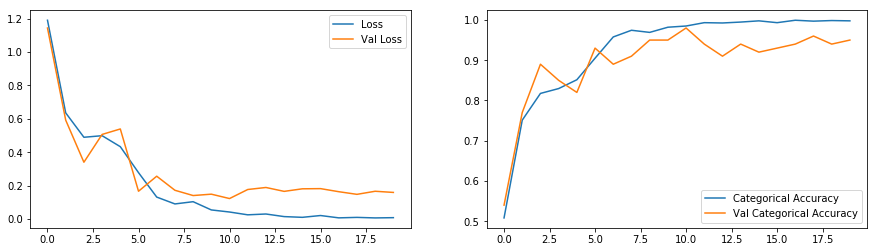

In [28]:
plot_acc(transfer_3)

Final Model is created using Mobilenet with below details.
    - Image Dimensions=(120,120)
    - Batch_Size=5
    - No_of_Frames=15
    - Epochs=20
    - With Gaussian Blur Augmentation

Best observed accuracies are recorded in 20th epoch and are as follows:
    Train_accuracy = 99.92%
    Validation_accuracy = 93%
    